In [1]:
# Load Library

packages <- c("dplyr", "haven","ggplot2")

install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}

lapply(packages, install_if_missing)

#test



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "haven"     "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggplot2"   "haven"     "dplyr"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"

# Read Data

## Helper Function

In [2]:
compare_variables <- function(ds1, ds2) {
  vars_ds1 <- colnames(ds1)
  vars_ds2 <- colnames(ds2)
  
  matched_vars <- intersect(vars_ds1, vars_ds2)
  only_in_ds1 <- setdiff(vars_ds1, vars_ds2)
  only_in_ds2 <- setdiff(vars_ds2, vars_ds1)

  list(
    matched = matched_vars,
    only_in_ds1 = only_in_ds1,
    only_in_ds2 = only_in_ds2
  )
}


compare_variable_list <- function(dataset, var_list) {
  dataset_vars <- colnames(dataset)
  
  matched_vars <- intersect(dataset_vars, var_list)
  only_in_dataset <- setdiff(dataset_vars, var_list)
  only_in_list <- setdiff(var_list, dataset_vars)
  
  return(list(
    matched = matched_vars,
    only_in_dataset = only_in_dataset,
    only_in_list = only_in_list
  ))
}


compare_list <- function(var_list1, var_list2) {
  
  matched_vars <- intersect(var_list1, var_list2)
  only_in_list1 <- setdiff(var_list1, var_list2)
  only_in_list2 <- setdiff(var_list2, var_list1)
  
  return(list(
    matched = matched_vars,
    only_in_list1 = only_in_list1,
    only_in_list2 = only_in_list2
  ))
}


## Selected Variables

In [3]:
var9902 <- readLines("Data/var9902.txt") # Selected Variable for Diet
length(var9902)
var0304 <- readLines("Data/var0304.txt") # Selected Variable for Diet
length(var0304)
var0520 <- readLines("Data/var0520.txt") # Selected Variable for Diet
length(var0520)

var_nhanes <- readLines("Data/Nhanes_Variables.txt") # Selected Variable for Nhanes
length(var_nhanes)

Warning message in readLines("Data/var9902.txt"):
"incomplete final line found on 'Data/var9902.txt'"


[1] 46

Warning message in readLines("Data/var0304.txt"):
"incomplete final line found on 'Data/var0304.txt'"


[1] 46

Warning message in readLines("Data/var0520.txt"):
"incomplete final line found on 'Data/var0520.txt'"


[1] 46

[1] 11

In [4]:
# compare_list(var9902, var0304)
# compare_list(var0304, var0520)

## Read Nhanes Data

In [6]:
nahnes <- read.csv("Data/nhanes_data.csv") %>% 
    select(all_of(var_nhanes))
head(nahnes)

,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,cc_bmi
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,12,1999-2000,18 to 44,Non-Hispanic White,No,37,No,Men,176.6667,102.00000,30 to <35
2,21,1999-2000,18 to 44,Hispanic,No,18,No,Men,121.3333,80.00000,35+
3,27,1999-2000,18 to 44,Hispanic,No,18,No,Men,118.0000,78.00000,25 to <30
4,28,1999-2000,18 to 44,Non-Hispanic White,No,18,No,Men,94.0000,42.66667,<25
5,56,1999-2000,18 to 44,Non-Hispanic White,No,21,No,Men,121.0000,65.00000,<25
6,57,1999-2000,18 to 44,Non-Hispanic White,No,39,No,Men,119.3333,85.33333,25 to <30


## Read DT1TOT Data

In [7]:
# DR1TOT
tot <- data.frame() 

## DR1TOT_A Have different water variable name, rename it
tot_a <- read_xpt("Data/DR1TOT_A.xpt")
names(tot_a)[names(tot_a) == "DRXTWATE"] <- "DRXTMOIS"
tot_a <- tot_a  %>% 
    select(all_of(var9902))

tot <- rbind(tot, tot_a)


## DR1TOT_B
tot_b <- read_xpt("Data/DR1TOT_B.xpt")
tot_b <- tot_b  %>% 
    select(all_of(var9902))

tot <- rbind(tot, tot_b)


## DR1TOT_C
tot_c <- read_xpt("Data/DR1TOT_C.xpt")
tot_c <- tot_c  %>% 
    select(all_of(var0304))
names(tot_c) <- var9902 # Same Vairbale Name

tot <- rbind(tot, tot_c)


## DR1TOT_D to DR1TOT_J
files <- paste0("Data/DR1TOT_", LETTERS[4:10], ".xpt")  

for (file in files) {
    temp <- read_xpt(file) %>%
        select(all_of(var0520))
    
    names(temp) <- var9902  #Same Vairbale Name
    
    tot <- rbind(tot, temp) 
}

# View Data
head(tot)
tail(tot)

SEQN,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,31.96,250.36,27.24,9.40,9.00,6.40,46.55,7.41,1.43,⋯,0.03,0.00,6.07,0.27,0,0.03,0.00,0.00,0.00,243.38
2,123.16,350.37,71.95,24.34,26.48,11.94,313.95,36.99,2.90,⋯,0.09,0.02,10.07,1.14,0,0.26,0.00,0.01,0.02,0.00
3,40.19,233.63,49.94,15.61,19.57,11.84,86.22,11.16,1.37,⋯,0.16,0.00,11.12,0.55,0,0.07,0.01,0.02,0.03,531.00
4,56.16,191.03,56.20,27.54,20.13,4.67,194.78,5.45,0.95,⋯,0.05,0.14,3.96,0.66,0,0.05,0.00,0.00,0.00,1652.00
5,97.13,253.98,114.52,36.00,60.55,11.35,180.57,17.28,2.92,⋯,0.18,0.00,10.03,1.25,0,0.07,0.00,0.01,0.01,1298.00
6,24.63,202.11,25.15,7.78,7.84,7.15,38.45,6.24,0.97,⋯,0.05,0.01,6.41,0.69,0,0.03,0.00,0.00,0.00,1711.00


SEQN,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
124817,51.33,90.33,63.18,25.360,22.624,9.509,813,5.8,0.691,⋯,0.106,0.000,8.038,0.832,0.001,0.392,0.003,0.025,0.111,1521.0
124818,58.05,512.14,183.51,62.115,61.034,45.841,220,15.0,0.647,⋯,0.444,0.004,41.362,4.263,0.000,0.088,0.010,0.019,0.006,0.0
124819,67.43,197.26,77.71,32.515,24.228,10.880,175,8.3,1.421,⋯,0.164,0.001,9.937,0.981,0.002,0.070,0.007,0.018,0.003,225.0
124820,39.32,157.81,48.77,15.558,13.070,14.765,84,12.3,2.002,⋯,0.138,0.004,13.410,1.293,0.002,0.042,0.007,0.009,0.001,0.0
124821,138.10,110.59,76.03,15.733,30.469,20.797,484,6.7,1.688,⋯,0.546,0.020,17.314,1.944,0.009,0.309,0.124,0.090,0.350,1267.5
124822,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Merge Nhanes and DT1TOT

In [8]:
merge_df <- merge(nahnes, tot, by.x = "svy_id", by.y = "SEQN")

head(merge_df)
tail(merge_df)

,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,1999-2000,75+,Non-Hispanic White,No,77,No,Men,100.6667,56.66667,⋯,0.09,0.02,10.07,1.14,0.00,0.26,0.00,0.01,0.02,0
2,5,1999-2000,45 to 64,Non-Hispanic White,No,49,No,Men,122.0000,82.66667,⋯,0.18,0.00,10.03,1.25,0.00,0.07,0.00,0.01,0.01,1298
3,6,1999-2000,18 to 44,Other,No,19,No,Women,114.6667,68.00000,⋯,0.05,0.01,6.41,0.69,0.00,0.03,0.00,0.00,0.00,1711
4,7,1999-2000,45 to 64,Non-Hispanic Black,Yes,59,No,Women,125.3333,80.00000,⋯,0.08,0.01,15.31,2.23,0.06,0.13,0.15,0.03,0.20,236
5,10,1999-2000,18 to 44,Non-Hispanic Black,Yes,43,No,Men,145.3333,96.00000,⋯,0.20,0.01,12.73,2.06,0.00,0.28,0.00,0.00,0.00,1888
6,12,1999-2000,18 to 44,Non-Hispanic White,No,37,No,Men,176.6667,102.00000,⋯,0.31,0.33,35.46,3.46,0.00,0.49,0.01,0.00,0.09,3304


,svy_id,svy_year,demo_age_cat,demo_race,demo_race_black,demo_age_years,demo_pregnant,demo_gender,bp_sys_mean,bp_dia_mean,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
59794,124814,2017-2020,45 to 64,Non-Hispanic Black,Yes,64,No,Men,140.1667,85.36667,⋯,0.211,0.008,16.079,1.911,0.000,0.085,0.005,0.009,0.005,1014.0
59795,124815,2017-2020,45 to 64,Non-Hispanic Black,Yes,52,No,Men,141.5000,85.36667,⋯,0.403,0.066,13.748,1.040,0.106,0.455,0.008,0.030,0.093,2028.0
59796,124817,2017-2020,65 to 74,Hispanic,No,67,No,Women,113.5000,66.03333,⋯,0.106,0.000,8.038,0.832,0.001,0.392,0.003,0.025,0.111,1521.0
59797,124818,2017-2020,18 to 44,Non-Hispanic Black,Yes,40,No,Men,104.5000,66.03333,⋯,0.444,0.004,41.362,4.263,0.000,0.088,0.010,0.019,0.006,0.0
59798,124821,2017-2020,45 to 64,Non-Hispanic Black,Yes,63,No,Men,125.5000,65.36667,⋯,0.546,0.020,17.314,1.944,0.009,0.309,0.124,0.090,0.350,1267.5
59799,124822,2017-2020,65 to 74,Hispanic,No,74,No,Men,123.5000,55.03333,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## cleaning the data

In [9]:
##' exclude pregnant women and missing responses on bp
merge_df <- merge_df %>% 
  filter(demo_pregnant == "No") %>% 
  filter(!is.na(bp_sys_mean) & !is.na(bp_dia_mean))

Tried locally that most missing values are missing together as an observation for all year cycle. Specifically, those variables missing together are the ones that represent types of fatty acids. `cc_bmi` and `DRD320GW` have missing indexes partially overlapping with the acids.
And no variable is missing more than 10% of the total sample size of the year cycle. So the complete merged data set can be imputed using the union of indexes of all year cycles.

In [10]:
# together:
ms_idx<- lapply(names(merge_df), function(col) which(is.na(merge_df[[col]])))
names(ms_idx) <- names(merge_df)
ms_idx_len <- lapply(ms_idx, length)

# delete the union of the indexes
mid_u <- union(ms_idx$DRD320GW, ms_idx$DRXTP226)
union_idx <- union(ms_idx$cc_bmi, mid_u)
merge_df_cln <- merge_df[-union_idx,]
# check: get the missing value indexes again
ms_idx_cln <- lapply(names(merge_df_cln), function(col) which(is.na(merge_df_cln[[col]])))
names(ms_idx_cln) <- names(merge_df_cln)
ms_idx_cln_len <- lapply(ms_idx_cln, length)

In [11]:
# print the length of missing values for each variable
print(ms_idx_cln_len)

$svy_id
[1] 0

$svy_year
[1] 0

$demo_age_cat
[1] 0

$demo_race
[1] 0

$demo_race_black
[1] 0

$demo_age_years
[1] 0

$demo_pregnant
[1] 0

$demo_gender
[1] 0

$bp_sys_mean
[1] 0

$bp_dia_mean
[1] 0

$cc_bmi
[1] 0

$DRXTPROT
[1] 0

$DRXTCARB
[1] 0

$DRXTTFAT
[1] 0

$DRXTSFAT
[1] 0

$DRXTMFAT
[1] 0

$DRXTPFAT
[1] 0

$DRXTCHOL
[1] 0

$DRXTFIBE
[1] 0

$DRXTVB6
[1] 0

$DRXTVB12
[1] 0

$DRXTFOLA
[1] 0

$DRXTVC
[1] 0

$DRXTCALC
[1] 0

$DRXTPHOS
[1] 0

$DRXTMAGN
[1] 0

$DRXTIRON
[1] 0

$DRXTZINC
[1] 0

$DRXTCOPP
[1] 0

$DRDTSODI
[1] 0

$DRXTPOTA
[1] 0

$DRXTSELE
[1] 0

$DRXTCAFF
[1] 0

$DRXTTHEO
[1] 0

$DRXTALCO
[1] 0

$DRXTMOIS
[1] 0

$DRXTS040
[1] 0

$DRXTS060
[1] 0

$DRXTS080
[1] 0

$DRXTS100
[1] 0

$DRXTS120
[1] 0

$DRXTS140
[1] 0

$DRXTS160
[1] 0

$DRXTS180
[1] 0

$DRXTM161
[1] 0

$DRXTM181
[1] 0

$DRXTM201
[1] 0

$DRXTM221
[1] 0

$DRXTP182
[1] 0

$DRXTP183
[1] 0

$DRXTP184
[1] 0

$DRXTP204
[1] 0

$DRXTP205
[1] 0

$DRXTP225
[1] 0

$DRXTP226
[1] 0

$DRD320GW
[1] 0



## EDA and univariate analysis

In [12]:
summary(merge_df_cln)

     svy_id         svy_year         demo_age_cat        demo_race        
 Min.   :     2   Length:50563       Length:50563       Length:50563      
 1st Qu.: 30064   Class :character   Class :character   Class :character  
 Median : 56211   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 58259                                                           
 3rd Qu.: 82919                                                           
 Max.   :124821                                                           
 demo_race_black    demo_age_years  demo_pregnant      demo_gender       
 Length:50563       Min.   :18.00   Length:50563       Length:50563      
 Class :character   1st Qu.:31.00   Class :character   Class :character  
 Mode  :character   Median :47.00   Mode  :character   Mode  :character  
                    Mean   :47.75                                        
                    3rd Qu.:63.00                                        
                    Max.   :80.

In [58]:
calculate_stats <- function(data) {
  # Load necessary package
  if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
  if (!requireNamespace("modeest", quietly = TRUE)) install.packages("modeest")

  library(dplyr)
  library(modeest)

  # Initialize an empty list to store results
  results <- list()
  
  # Iterate through each column
  for (col_name in colnames(data)) {
    column <- data[[col_name]]
    
    if (is.numeric(column)) {
      # Calculate mean, median, and mode for numeric columns
      mean_value <- mean(column, na.rm = TRUE)
      median_value <- median(column, na.rm = TRUE)
      mode_value <- mlv(column, method = "mfv")$M
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "numeric",
        mean = mean_value,
        median = median_value,
        mode = mode_value
      )
      
    } else {
      # Convert character columns to factor
      data[[col_name]] <- as.factor(column)
      
      # Calculate frequency table for categorical variables
      freq_table <- table(data[[col_name]])
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "categorical",
        frequencies = as.list(freq_table)
      )
    }
  }
  
  # Return both the computed statistics and the modified dataset
  return(list(statistics = results, modified_data = data))
}

# Example usage
# df <- data.frame(num_col = c(1, 2, 2, 3, 4, 4, 4, NA), char_col = c("A", "B", "A", "B", "C", "C", "C", "C"))
result <- calculate_stats(merge_df_cln)
# print(result$statistics)
# print(str(result$modified_data))


Installing package into 'C:/Users/11366/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'timeSeries', 'gss', 'rmutil', 'clue', 'fBasics', 'stable', 'stabledist', 'statip'




package 'timeSeries' successfully unpacked and MD5 sums checked
package 'gss' successfully unpacked and MD5 sums checked
package 'rmutil' successfully unpacked and MD5 sums checked
package 'clue' successfully unpacked and MD5 sums checked
package 'fBasics' successfully unpacked and MD5 sums checked
package 'stable' successfully unpacked and MD5 sums checked
package 'stabledist' successfully unpacked and MD5 sums checked
package 'statip' successfully unpacked and MD5 sums checked
package 'modeest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\11366\AppData\Local\Temp\RtmpKg7Nf2\downloaded_packages


ERROR: Error in mlv(column, method = "mfv")$M: $ operator is invalid for atomic vectors


In [ ]:
mlv(column, method = "mfv")$M

In [13]:
summary(as.factor(merge_df_cln$demo_age_cat))

18 to 44 45 to 64 65 to 74      75+ 
   22945    16029     6508     5081

In [15]:
summary(as.factor(merge_df_cln$demo_age_years))

18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33 
1831 1718  792  780  815  797  754  734  717  699  740  760  765  771  786  725 
  34   35   36   37   38   39   40   41   42   43   44   45   46   47   48   49 
 778  715  800  753  768  805  870  824  805  821  822  868  829  796  788  753 
  50   51   52   53   54   55   56   57   58   59   60   61   62   63   64   65 
 799  841  803  769  806  752  713  658  594  650 1068  966  919  871  786  775 
  66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 743  681  659  616  720  621  606  564  523  510  450  396  421  334 2970

In [14]:
summary(as.factor(merge_df_cln$demo_race))

Hispanic Non-Hispanic Asian Non-Hispanic Black Non-Hispanic White 
             13115               2413              11069              22010 
             Other 
              1956

In [16]:
summary(as.factor(merge_df_cln$demo_gender))  # balanced in gender

Men Women 
25516 25047

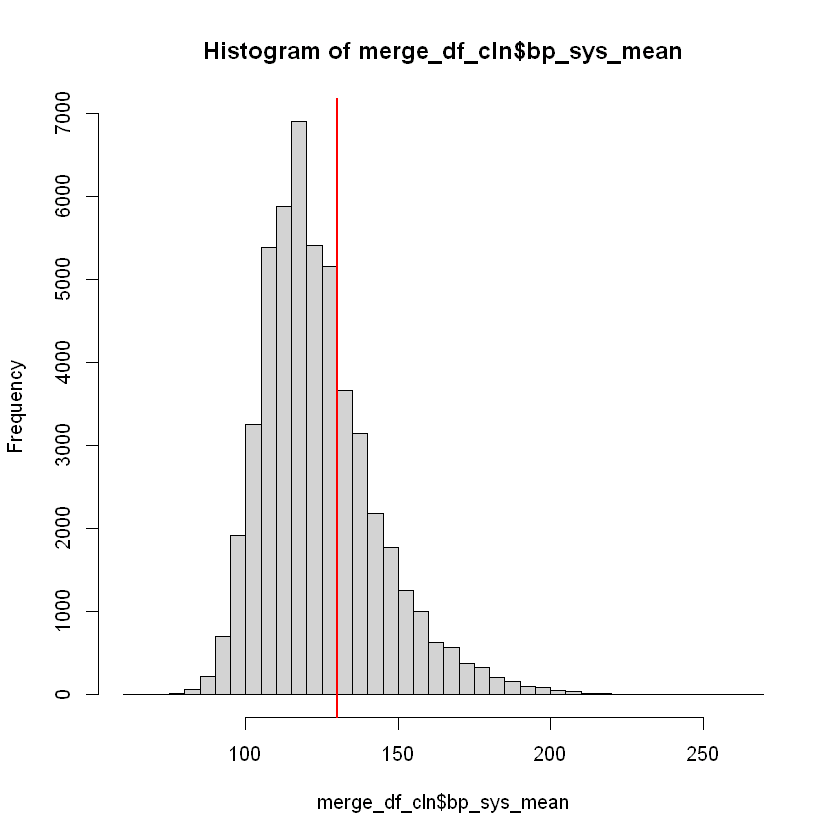

In [19]:
hist(merge_df_cln$bp_sys_mean, breaks=30)
abline(v=130, col="red", lwd=2)

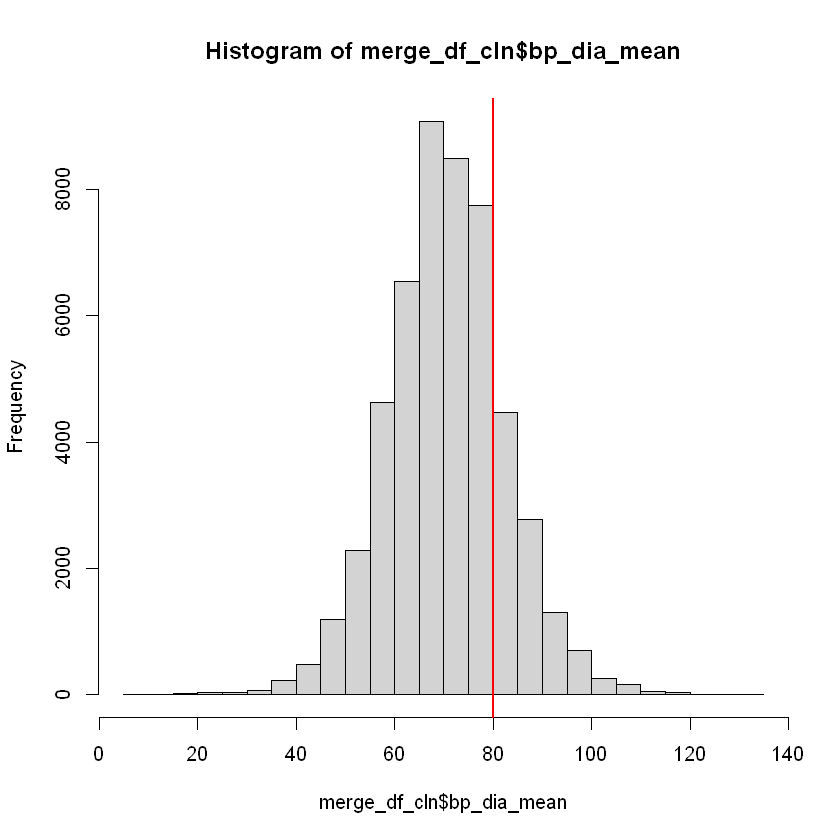

In [20]:
hist(merge_df_cln$bp_dia_mean, breaks=30)
abline(v=80, col="red", lwd=2)

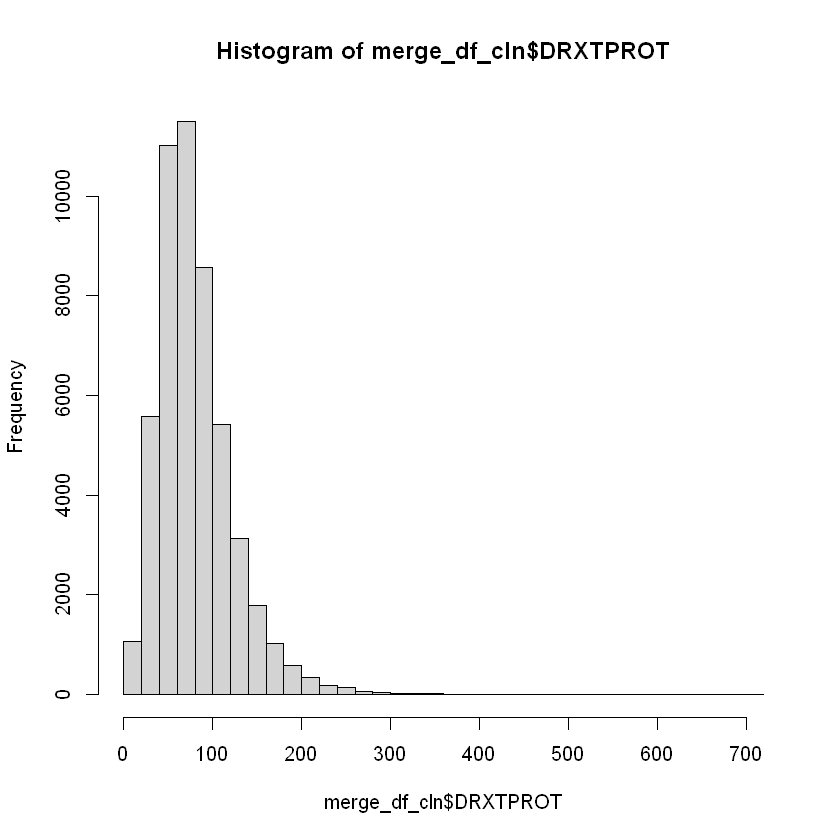

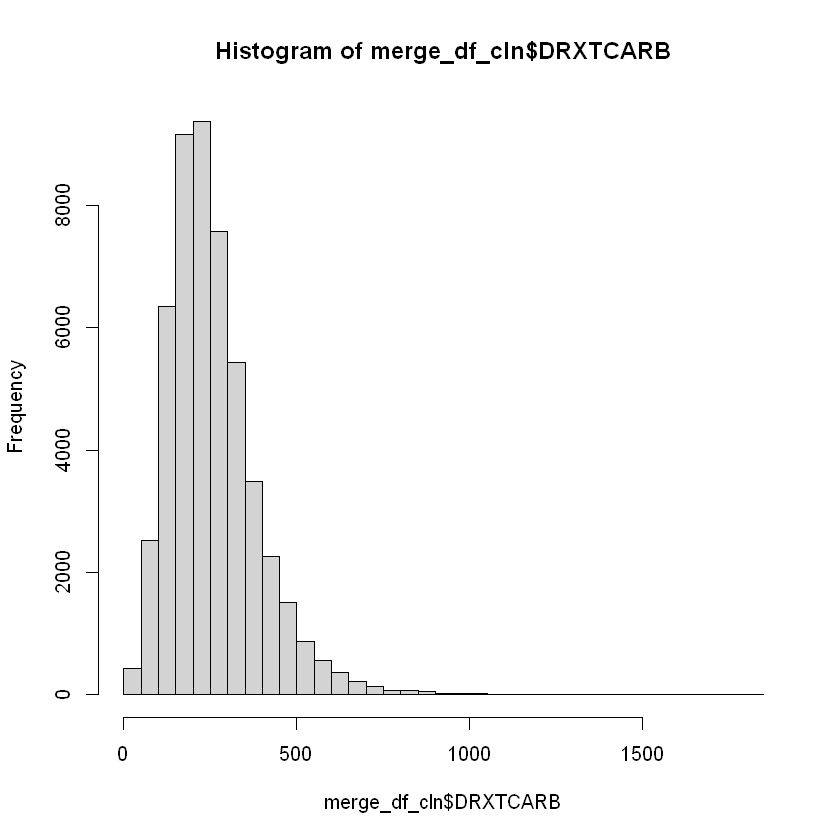

In [55]:
protein<- hist(merge_df_cln$DRXTPROT, breaks=30)
carbonhydrate<- hist(merge_df_cln$DRXTCARB, breaks=30)

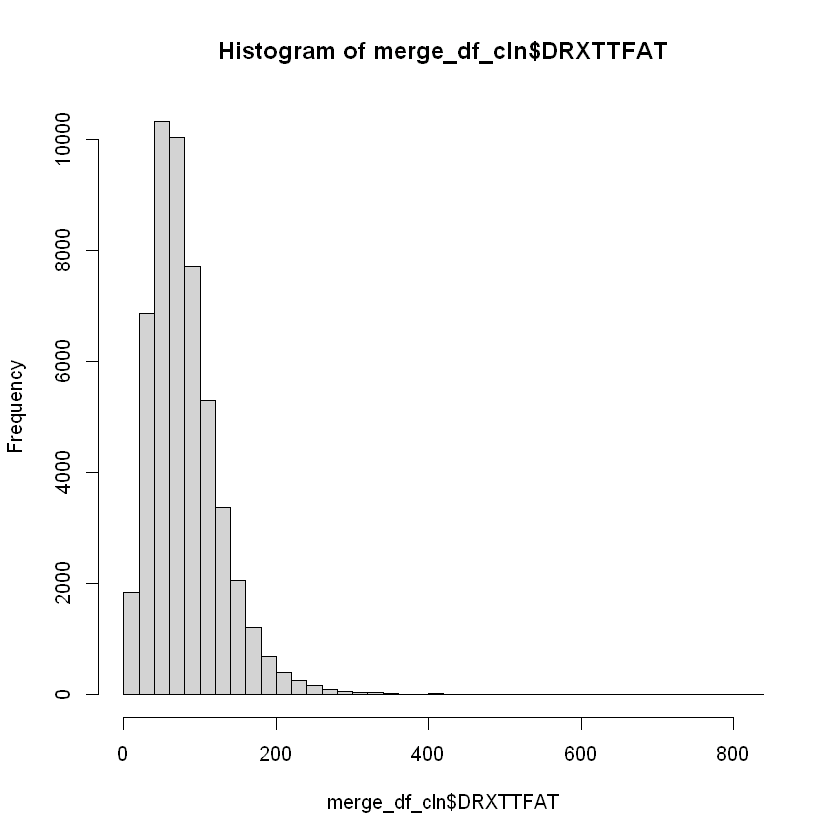

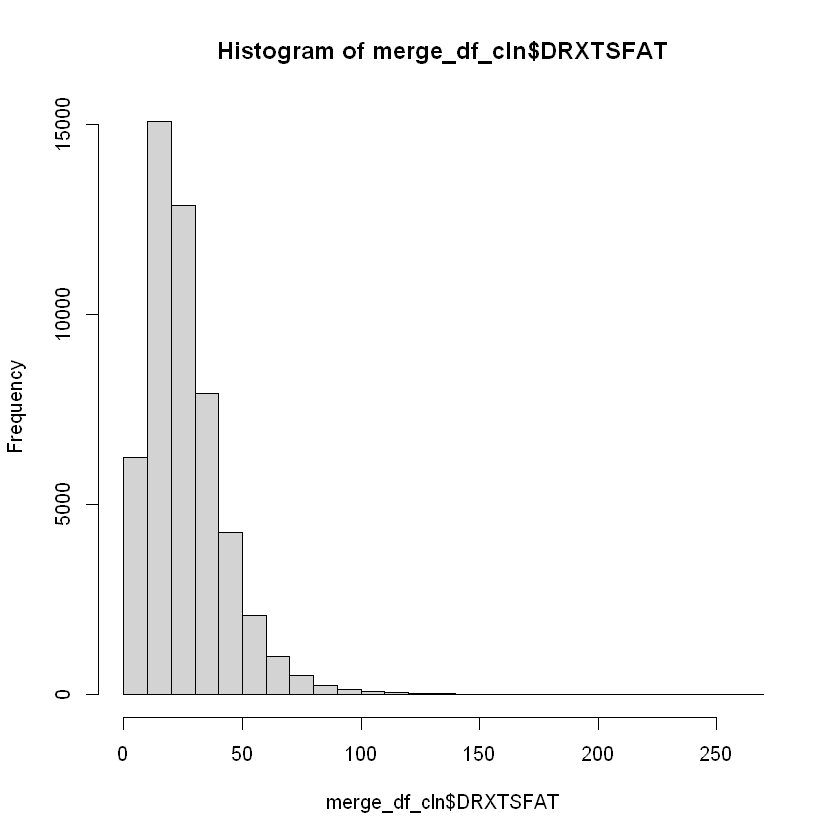

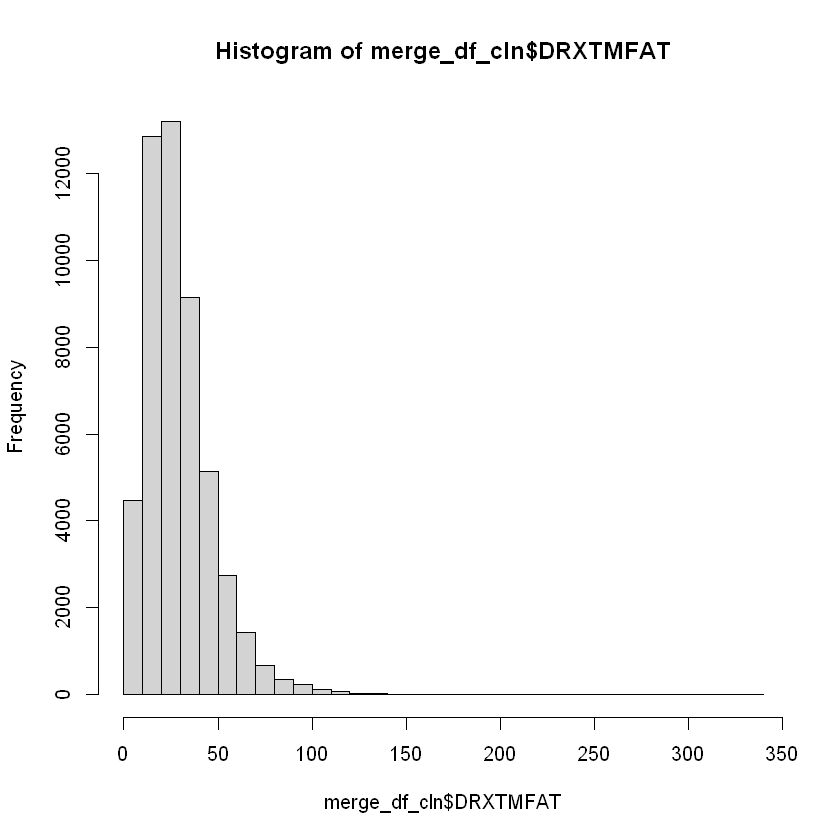

In [56]:
hist(merge_df_cln$DRXTTFAT, breaks=30)
hist(merge_df_cln$DRXTSFAT, breaks=30)
hist(merge_df_cln$DRXTMFAT, breaks=30)

In [34]:
summary(as.factor(merge_df_cln$cc_bmi))

<25 25 to <30 30 to <35       35+ 
    15796     16620     10120      8027

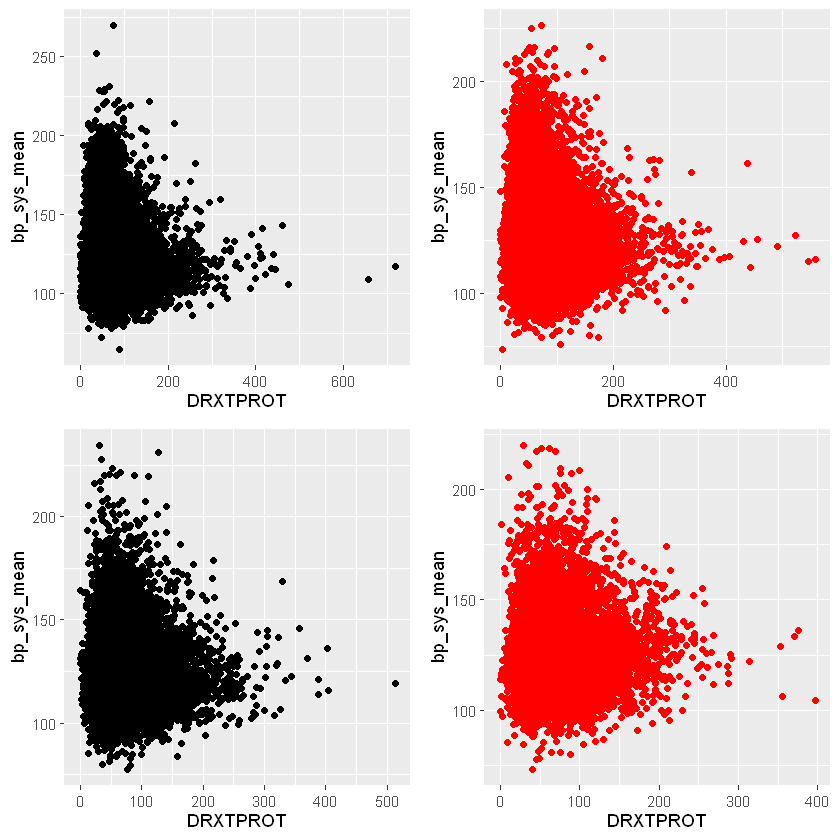

In [53]:
library(gridExtra)
p1 <- merge_df_cln %>%
    filter(cc_bmi == "<25") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point()
p2 <- merge_df_cln %>%
    filter(cc_bmi == "25 to <30") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point(color="red")
p3 <- merge_df_cln %>%
    filter(cc_bmi == "30 to <35") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point()

p4 <- merge_df_cln %>%
    filter(cc_bmi == "35+") %>%
    ggplot(aes(x = DRXTPROT, y = bp_sys_mean)) + geom_point(color="red")

# Arrange the plots in a 2x2 grid
grid.arrange(p1, p2, p3, p4, ncol = 2)

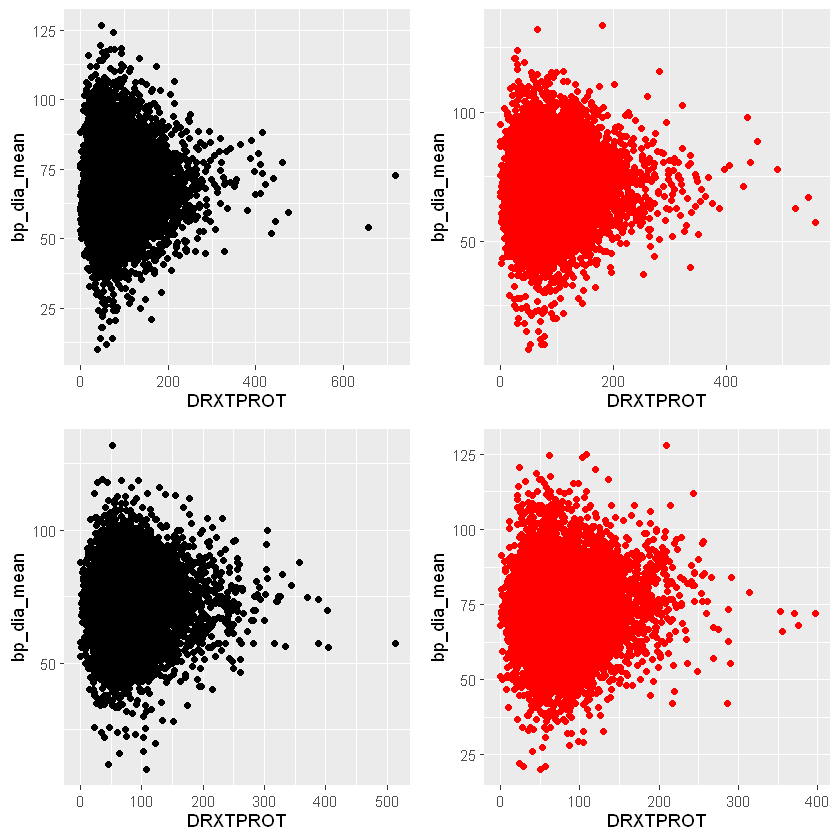

In [52]:
p1 <- merge_df_cln %>%
    filter(cc_bmi == "<25") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point()
p2 <- merge_df_cln %>%
    filter(cc_bmi == "25 to <30") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point(color="red")
p3 <- merge_df_cln %>%
    filter(cc_bmi == "30 to <35") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point()
p4 <- merge_df_cln %>%
    filter(cc_bmi == "35+") %>%
    ggplot(aes(x = DRXTPROT, y = bp_dia_mean)) + geom_point(color="red")
grid.arrange(p1, p2, p3, p4, ncol = 2)

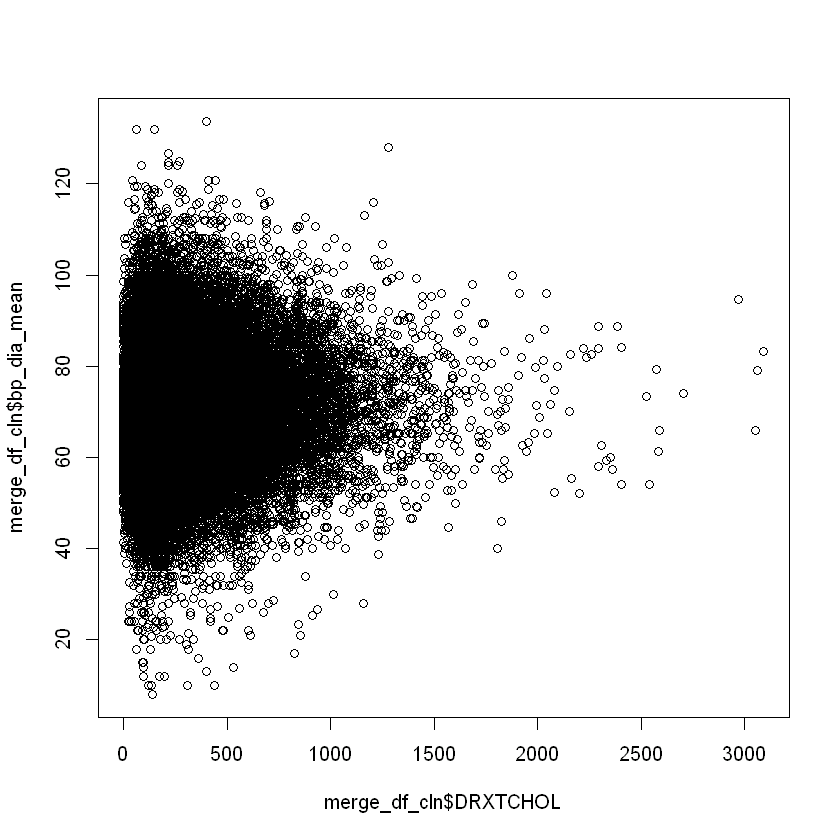

In [57]:
plot(merge_df_cln$DRXTCHOL, merge_df_cln$bp_dia_mean)

## Univariate analysis